In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

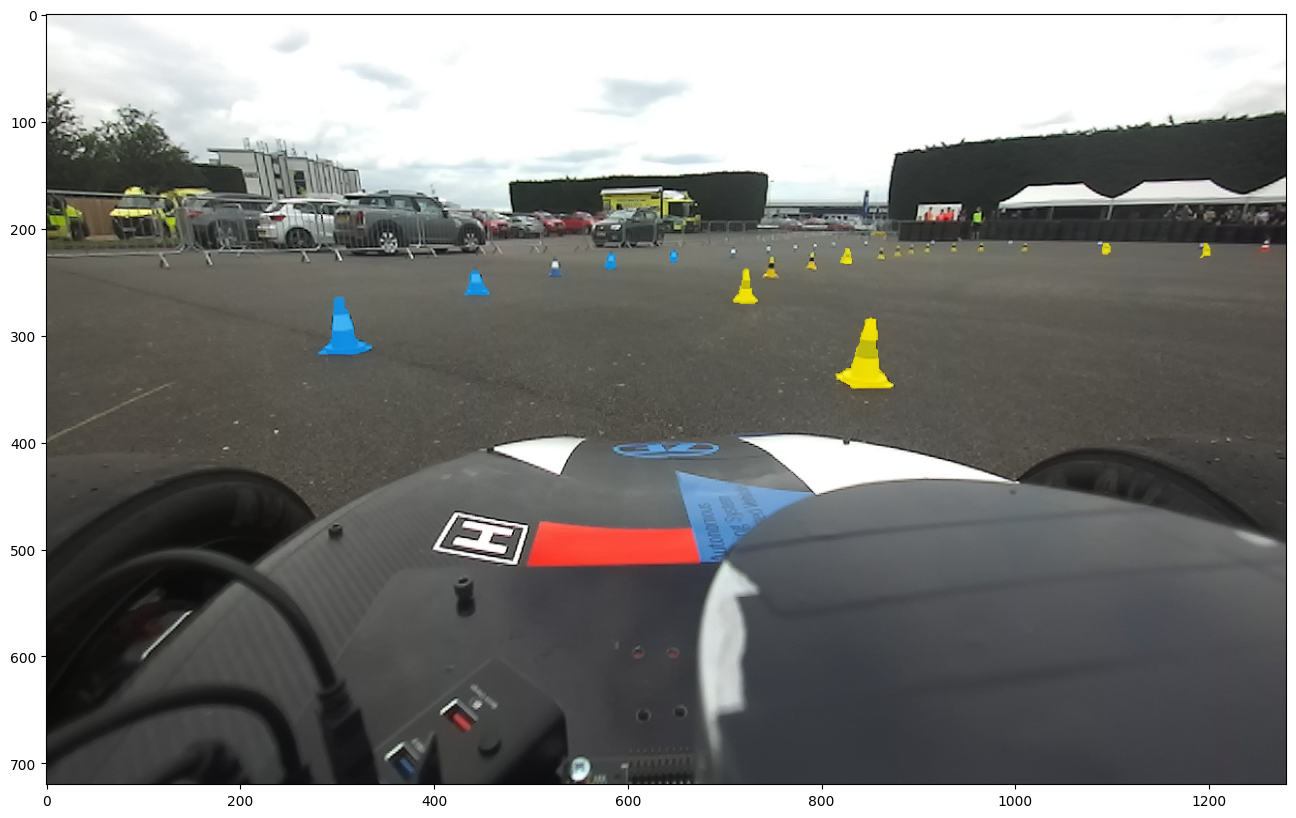

In [38]:
filename = "107.png"
image_dir = "/home/aidan/dissertation/dissertation/data/frames/real_world"
annotation_dir = "/home/aidan/dissertation/dissertation/data/frames/real_world_auto_annotate_labels"

# Class colour mapping
class_colour_map = {
    9: (255, 139, 23, 255),
    2: (252, 244, 0, 255),
    7: (0, 160, 252, 255),
}

# Read annotation and image
with open(f"{annotation_dir}/{'.'.join(filename.split('.')[:-1])}.txt") as file:
    annotations = [list(map(float, line.strip().split(" "))) for line in file.read().strip().split("\n")]
img = cv2.cvtColor(cv2.imread(f"{image_dir}/{filename}"), cv2.COLOR_BGR2RGBA)

# Generate semantic map image
semantic_map = np.zeros_like(img)
for annotation in annotations:
    points = annotation[1:]
    points = np.reshape(np.array(points), (len(points)//2, 2))
    points[:, 0] *= img.shape[1]
    points[:, 1] *= img.shape[0]
    points = np.int32(points)

    semantic_map = cv2.fillPoly(semantic_map, [points], class_colour_map[int(annotation[0])])

# Overlay semantic map and display
mask = np.nonzero(np.sum(semantic_map, axis=2))
blend_alpha = 0.7
img[mask] = cv2.addWeighted(semantic_map, blend_alpha, img, 1-blend_alpha, 0.0)[mask]
plt.figure(figsize = (16,10))
plt.imshow(img, aspect='auto')
plt.show()